<a href="https://colab.research.google.com/github/FatouS27/305-Fall-2025/blob/main/Fatouja_Project1_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Which products or categories generate the most revenue?

In [5]:
import pandas as pd
df = pd.read_csv('/content/Online Retail.csv' , encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom


In [6]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [24]:
product_revenue = df.groupby('Description')['Revenue'].sum().reset_index()
product_revenue.head(5)

,Description,Revenue
0,4 PURPLE FLOCK DINNER CANDLES,53.47
1,OVAL WALL MIRROR DIAMANTE,766.29
2,SET 2 TEA TOWELS I LOVE LONDON,2961.88
3,SPACEBOY BABY GIFT SET,106.65
4,*Boombox Ipod Classic,16.98


In [26]:
top_products = product_revenue.nlargest(10, 'Revenue')
top_products.head(10)

,Description,Revenue
2303,REGENCY CAKESTAND 3 TIER,54163.63
891,DOTCOM POSTAGE,51122.81
2984,WHITE HANGING HEART T-LIGHT HOLDER,31947.36
636,CHILLI LIGHTS,17787.68
1467,JUMBO BAG RED RETROSPOT,16485.17
2935,VINTAGE UNION JACK MEMOBOARD,14230.90
2160,POSTAGE,13152.17
1364,HEART OF WICKER SMALL,12395.86
3023,WOOD BLACK BOARD ANT WHITE FINISH,11473.86
1363,HEART OF WICKER LARGE,11214.99


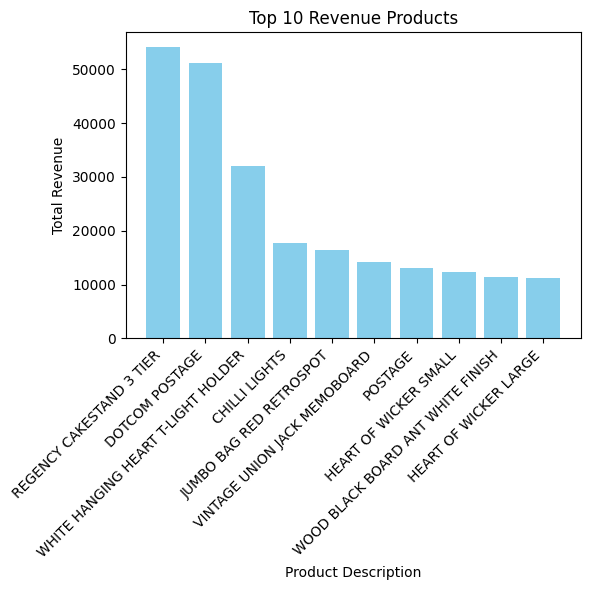

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.bar(top_products['Description'], top_products['Revenue'], color='skyblue')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.title('Top 10 Revenue Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Who are the top customers by total spending?

In [31]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
customer_spending = df.groupby('CustomerID')['Revenue'].sum().reset_index()
customer_spending.head()

,CustomerID,Revenue
0,12346.0,0.00
1,12347.0,1187.18
2,12348.0,1120.24
3,12350.0,334.40
4,12352.0,440.85


In [32]:
top_customers = customer_spending.nlargest(10, 'Revenue')
top_customers.head(10)

,CustomerID,Revenue
750,14646.0,57821.02
1838,18102.0,39766.09
24,12415.0,37674.04
576,14156.0,25737.10
875,15061.0,23420.94
1088,15749.0,22998.40
1624,17450.0,21616.66
1178,16029.0,19362.27
1639,17511.0,18168.89
260,13089.0,16146.22


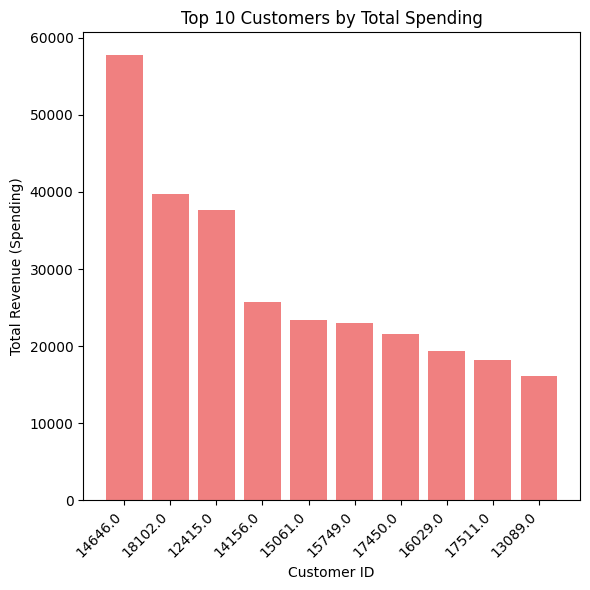

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.bar(top_customers['CustomerID'].astype(str), top_customers['Revenue'], color='lightcoral')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue (Spending)')
plt.title('Top 10 Customers by Total Spending')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

How do sales vary over time (daily, monthly)?

In [38]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115568 entries, 0 to 115567
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    115568 non-null  object        
 1   StockCode    115568 non-null  object        
 2   Description  115240 non-null  object        
 3   Quantity     115567 non-null  float64       
 4   InvoiceDate  115567 non-null  datetime64[ns]
 5   UnitPrice    115567 non-null  float64       
 6   CustomerID   77219 non-null   float64       
 7   Country      115567 non-null  object        
 8   Revenue      115567 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 7.9+ MB


In [41]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115568 entries, 0 to 115567
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    115568 non-null  object        
 1   StockCode    115568 non-null  object        
 2   Description  115240 non-null  object        
 3   Quantity     115567 non-null  float64       
 4   InvoiceDate  115567 non-null  datetime64[ns]
 5   UnitPrice    115567 non-null  float64       
 6   CustomerID   77219 non-null   float64       
 7   Country      115567 non-null  object        
 8   Revenue      115567 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 7.9+ MB


In [42]:
df['Date'] = df['InvoiceDate'].dt.date
daily_sales = df.groupby('Date')['Revenue'].sum().reset_index()
daily_sales.head()

,Date,Revenue
0,2010-12-01,58635.56
1,2010-12-02,46207.28
2,2010-12-03,45620.46
3,2010-12-05,31383.95
4,2010-12-06,53860.18


In [43]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Revenue'].sum().reset_index()
monthly_sales.head()

,Month,Revenue
0,2010-12,748957.02
1,2011-01,560000.26
2,2011-02,498062.65
3,2011-03,183774.50


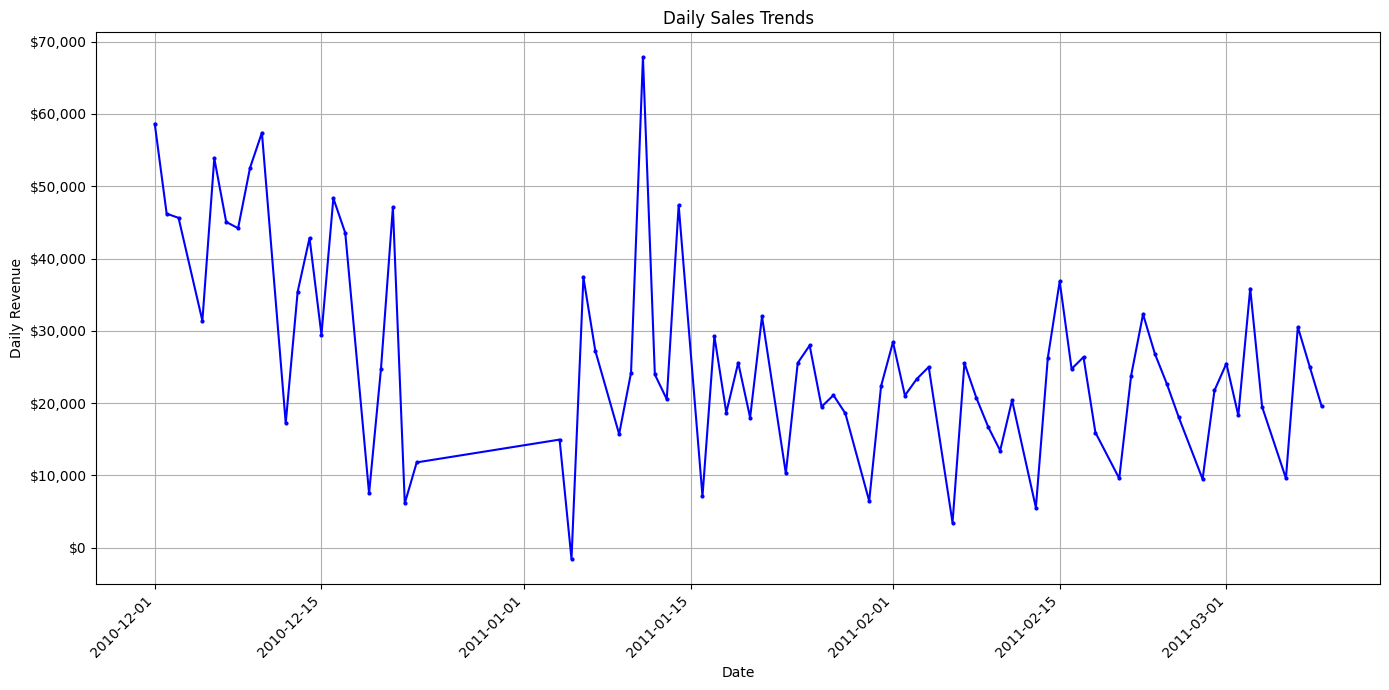

In [44]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.figure(figsize=(14, 7)) # Slightly larger figure
plt.plot(daily_sales['Date'], daily_sales['Revenue'], color='blue', marker='o', markersize=2, linestyle='-')
plt.xlabel('Date')
plt.ylabel('Daily Revenue')
plt.title('Daily Sales Trends')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

# Format y-axis as currency
formatter = mticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

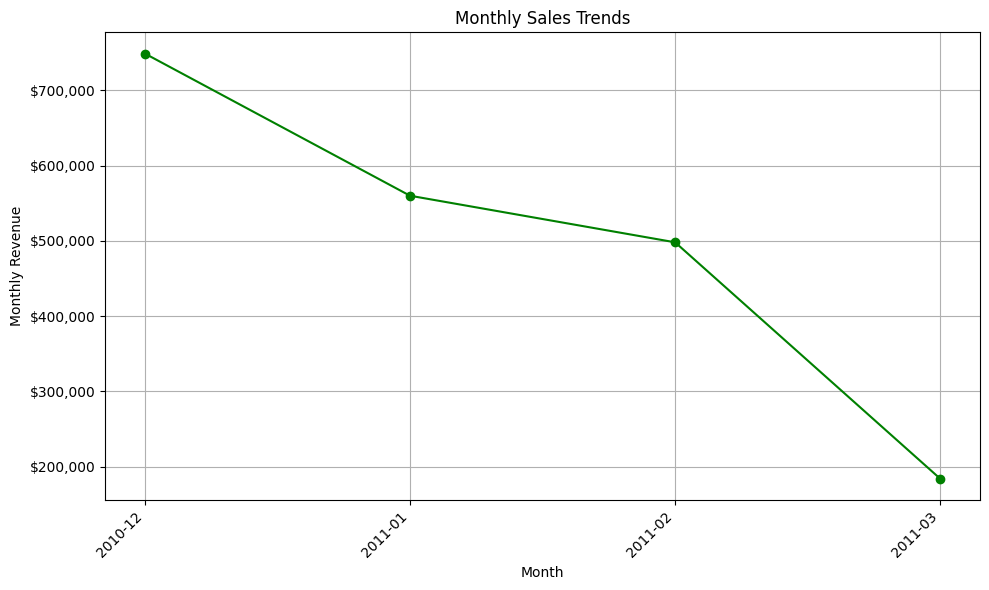

In [49]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Revenue'], color='green', marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Monthly Revenue')
plt.title('Monthly Sales Trends')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

# Format y-axis as currency
formatter = mticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

What is the distribution of new vs returning customers?

In [51]:
df['FirstPurchaseDate'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date,Month,FirstPurchaseDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12,2010-12-01 08:26:00


In [54]:
df['CustomerType'] = df.apply(lambda row: 'New Customer' if row['InvoiceDate'] == row['FirstPurchaseDate'] else 'Returning Customer', axis=1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Date,Month,FirstPurchaseDate,CustomerType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12,2010-12-01 08:26:00,New Customer
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12,2010-12-01 08:26:00,New Customer
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12,2010-12-01 08:26:00,New Customer
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12,2010-12-01 08:26:00,New Customer
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12,2010-12-01 08:26:00,New Customer


In [56]:
customer_type_counts = df['CustomerType'].value_counts()
display(customer_type_counts)

,count
CustomerType,
Returning Customer,76520
New Customer,39048


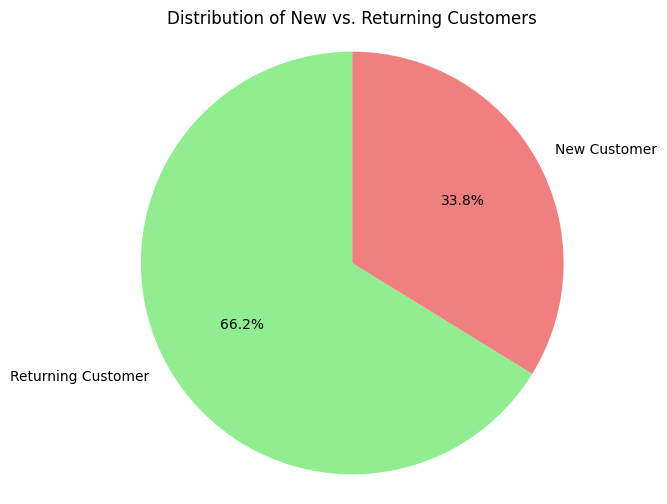

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of New vs. Returning Customers')
plt.axis('equal')
plt.show()

Which region or store location performs best?

In [58]:
country_revenue = df.groupby('Country')['Revenue'].sum().reset_index()
country_revenue.head()

,Country,Revenue
0,Australia,41208.42
1,Austria,941.44
2,Bahrain,0.00
3,Belgium,6094.40
4,Channel Islands,5198.52


In [59]:
top_countries_by_revenue = country_revenue.nlargest(10, 'Revenue')
top_countries_by_revenue.head(10)

,Country,Revenue
30,United Kingdom,1665763.01
20,Netherlands,58772.55
8,EIRE,44077.05
11,Germany,43173.48
0,Australia,41208.42
10,France,37496.36
17,Japan,13302.42
26,Spain,11551.27
23,Portugal,9162.32
28,Switzerland,8178.82


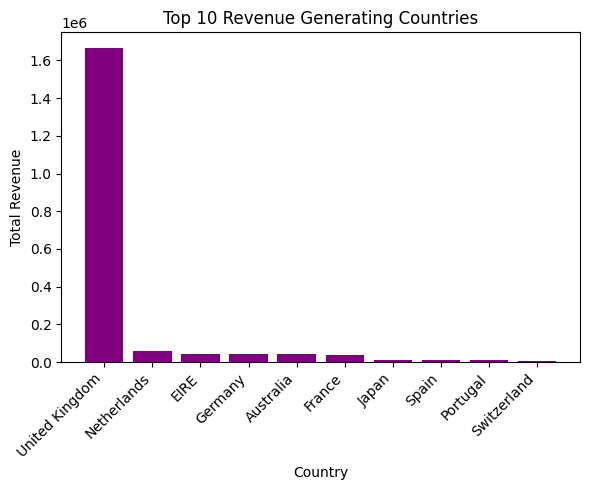

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.bar(top_countries_by_revenue['Country'], top_countries_by_revenue['Revenue'], color='purple')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Top 10 Revenue Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

OOP


In [64]:
class SalesAnalyzer:
    def __init__(self, data_frame):
        self.df = data_frame.copy() # Work on a copy to avoid modifying original df directly
        # Convert 'InvoiceDate' to datetime objects with specified format
        self.df['InvoiceDate'] = pd.to_datetime(self.df['InvoiceDate'], format='%m/%d/%y %H:%M')
        print("SalesAnalyzer initialized with DataFrame. 'InvoiceDate' column converted to datetime.")

    def clean_data(self):
        print("Cleaning data...")
        # Placeholder for data cleaning logic
        pass

    def get_top_products(self, n=10):
        print(f"Getting top {n} products...")
        # Placeholder for top products logic
        return pd.DataFrame()

    def get_top_customers(self, n=10):
        print(f"Getting top {n} customers...")
        # Placeholder for top customers logic
        return pd.DataFrame()

    def get_sales_trends(self):
        print("Calculating sales trends...")
        # Placeholder for sales trends logic
        return pd.DataFrame(), pd.DataFrame()

    def plot_top_products(self, n=10):
        print(f"Plotting top {n} products...")
        # Placeholder for plotting logic
        pass

    def plot_top_customers(self, n=10):
        print(f"Plotting top {n} customers...")
        # Placeholder for plotting logic
        pass

    def plot_daily_sales(self, daily_sales_df):
        print("Plotting daily sales...")
        # Placeholder for plotting logic
        pass

    def plot_monthly_sales(self, monthly_sales_df):
        print("Plotting monthly sales...")
        # Placeholder for plotting logic
        pass